In [4]:
import sys
sys.path.append("/Users/gillianchu/raphael/repos/problin/problin_libs")
from distance_based_lib import ML_pairwise_estimate

In [31]:
# estimate the pairwise distance matrix for an example tree
import dendropy
import os, glob
from dendropy.calculate import treecompare
t = "[&R] ((0:0.0360971597765934,1:3.339535381892265):0.0360971597765934,(2:0.0360971597765934,3:3.339535381892265):0.0360971597765934);"
true_tree = dendropy.Tree.get(data=t, schema="newick")


tree_dict = dict()
pdm_dict = dict()
nj_dict = dict()

for k in (20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 5000):
    outdir = "/Users/gillianchu/raphael/repos/problin/results_estbl/m10_k{0}_estbl".format(k)
    for filename in glob.iglob(outdir+"/*"):
        # print(filename)
        est_tree = dendropy.Tree.get(path=filename, schema="newick", taxon_namespace=true_tree.taxon_namespace)
        pdm = est_tree.phylogenetic_distance_matrix()
        if k not in tree_dict.keys():
            tree_dict[k] = []
            pdm_dict[k] = []
            nj_dict[k] = []
        tree_dict[k].append(est_tree)
        pdm_dict[k].append(pdm)
        nj_dict[k].append(pdm.nj_tree())

In [42]:
fn_dict = dict()
fp_dict = dict()
x = []
y_fn = []
y_fp = []
for k in (20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 5000):
    x.append(k)
    for nj_tree in nj_dict[k]:
        # false positive (found in nj_tree but not in true_tree)
        # false negative (found in true_tree but not in nj_tree)
        fp, fn = treecompare.false_positives_and_negatives(true_tree, nj_tree)
        if k not in fp_dict.keys():
            fp_dict[k] = []
            fn_dict[k] = []
        fp_dict[k].append(fp)
        fn_dict[k].append(fn)
    y_fp.append(np.mean(fp_dict[k]))
    y_fn.append(np.mean(fn_dict[k]))

Text(0, 0.5, 'False Positives in NJ Tree')

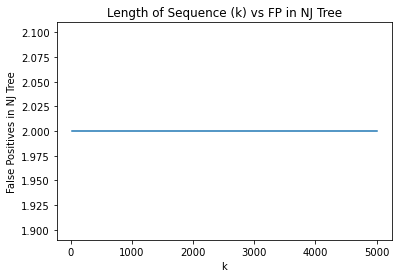

In [45]:
import matplotlib.pyplot as plt

k = 5000
# for pair in pair_dict.keys():
plt.title("Length of Sequence (k) vs FP in NJ Tree".format(pair))
plt.plot(x, y_fp)
ax = plt.gca()
plt.xlabel("k")
plt.ylabel("False Positives in NJ Tree")
# plt.savefig('/Users/gillianchu/raphael/repos/problin/results_estbl/plots/pair_{0}_{1}.jpg'.format(pair[0], pair[1]))
# plt.show()

Text(0, 0.5, 'False Negatives in NJ Tree')

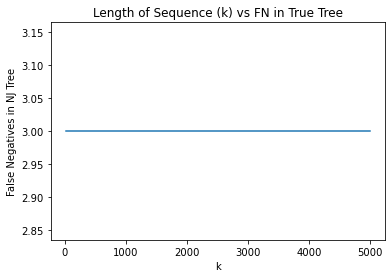

In [46]:
plt.title("Length of Sequence (k) vs FN in True Tree".format(pair))
plt.plot(x, y_fn)
ax = plt.gca()
plt.xlabel("k")
plt.ylabel("False Negatives in NJ Tree")